# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [76]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [40]:
# To make sure that there are no null values:

df.isnull().any()
#df.temperature.value_counts()


temperature    False
gender         False
heart_rate     False
dtype: bool

In [74]:
## Exploring the Temperature data


# The population mean
u= 98.6
print('The population mean: ' + str(u))

# The sample size of the population
n = len(df.index)
print('The sample size: ' + str(n))

# The mean temperature of the sample population
t = df['temperature'].mean()
print('The mean temperature of the sample is: ' + str(t))

# The standard deviation of the sample population
std = df['temperature'].std()
print('The standard deviation of the temperature of the sample is: ' + str(std))

#Temperature
temp_all = df.temperature
temp_m = df[df.gender == 'M'].temperature
temp_f = df[df.gender == 'F'].temperature

The population mean: 98.6
The sample size: 130
The mean temperature of the sample is: 98.24923076923078
The standard deviation of the temperature of the sample is: 0.7331831580389454


# Question no 1:
### Is the distribution of body temperatures normal?

Based on the graphs below, we can conclude that the body temperature is normally distributed.

/Users/debisreeray/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


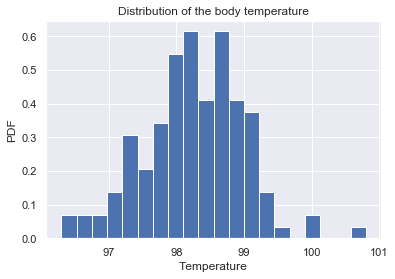

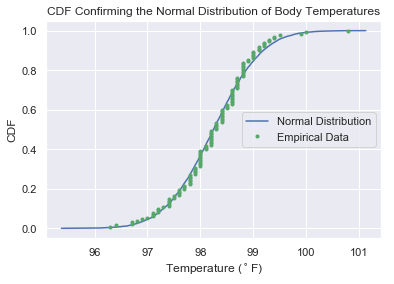

In [61]:
# Plot the temperature on the Human_Body_Temperature data set
# Looks like the graph is noramlly distributed
f,ax1 = plt.subplots(1,1)
sns.set()
#_=sns.distplot(df['temperature'],bins=10,norm_hist=False)
_=plt.hist(df['temperature'],normed=True,bins=20)
_=plt.ylabel('PDF')
_=plt.xlabel('Temperature')
_=plt.title('Distribution of the body temperature')
plt.show()

#

# Define a function to compute the CDF:

def cdf(d):
    """Compute CDF for a one-dimensional array of measurements."""

    # Number of data points:
    n = len(d)

    # x-data for the CDF:
    x = np.sort(d)

    # y-data for the CDF:
    y = np.arange(1, n+1) / n

    return x, y

# Seed the random number generator:
np.random.seed(42)

# Simulate a random sample with the same statistics and size of 10,000:
normal = np.random.normal(t, std, 10000)


# Compute the CDFs:
x_temp, y_temp = cdf(df.temperature)
x_norm, y_norm = cdf(normal)

# Plot both CDFs on the same plot:
fig = plt.plot(x_norm, y_norm)
fig = plt.plot(x_temp, y_temp, marker='.', linestyle='none',color='g')

# Label axes and add legend and a title:
fig = plt.xlabel('Temperature ($^\circ$F)')
fig = plt.ylabel('CDF')
fig = plt.legend(('Normal Distribution', 'Empirical Data'), loc='center right')
fig = plt.title('CDF Confirming the Normal Distribution of Body Temperatures')


# Save and display the plots:

plt.show()

# Question no 2:

### Is the sample size large? Are the observations independent? 

Yes, the sample size is large because n = 130, i.e. > 30 (See below). Also, we have seen earlier that there is no missing value. </br>
Yes, the observations are independent from each other. </br>


In [41]:
#The data rows and columns:

df.shape

(130, 3)

# Question no 3:
## Is the true population mean really 98.6 degrees F? 
* **First, try a bootstrap hypothesis test.**
* **Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?**
*  **In this situation, is it appropriate to use the  t  or  z  statistic?**
* **Now try using the other test. How is the result be different? Why?**

## Bootstrap Hypothesis Test

In [111]:
population_mean = 98.6
temp_sample_mean = np.mean(df.temperature)

def draw_bs_replicates(shifted_data, size=1000):
    '''Draw bootstrap replicates'''
    
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = np.mean(np.random.choice(shifted_data, len(shifted_data)))
        
    return bs_replicates


def bs_probability(data, population_mean):
    '''Estimates p-value with bootstrap '''
    
    mean_sample = np.mean(data)
    
    shifted_data = df.temperature - temp_sample_mean + population_mean
    
    bs_replicates = draw_bs_replicates(shifted_data, size=10000)
    
    if population_mean > mean_sample:
        p_value = np.sum(bs_replicates <= mean_sample) / len(bs_replicates)
    else:
        p_value = np.sum(bs_replicates >= mean_sample) / len(bs_replicates)
        
    return p_value

In [67]:
bs_probability(df.temperature, population_mean)

0.0

/Users/debisreeray/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([3.78457060e-03, 0.00000000e+00, 1.13537118e-02, 4.16302766e-02,
        1.36244541e-01, 4.39010189e-01, 9.91557496e-01, 1.96419214e+00,
        3.56128093e+00, 4.97292576e+00, 5.77525473e+00, 6.24454148e+00,
        5.31353712e+00, 3.98515284e+00, 2.36157205e+00, 1.19592431e+00,
        5.41193595e-01, 2.19505095e-01, 6.81222707e-02, 1.89228530e-02]),
 array([98.30461538, 98.33103846, 98.35746154, 98.38388462, 98.41030769,
        98.43673077, 98.46315385, 98.48957692, 98.516     , 98.54242308,
        98.56884615, 98.59526923, 98.62169231, 98.64811538, 98.67453846,
        98.70096154, 98.72738462, 98.75380769, 98.78023077, 98.80665385,
        98.83307692]),
 <a list of 20 Patch objects>)

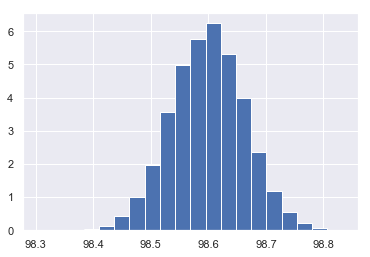

In [71]:
shifted_data = df.temperature - temp_sample_mean + population_mean
bs_reps = draw_bs_replicates(shifted_data, 10000)
plt.hist(bs_reps,bins=20, normed=True)

So, according to the P value, we can reject the null hypothesis.

* It would be good to use a 'one-sample test', because one set of data is compared to a single value. For this situation, it is best to use the Z-statistic in this case since sample size > 30. t-statistic is applicable for small sample size (n< 30). 

**Null Hypothesis:** The true population mean is equal to the conventional mean (98.6$^\circ$F).

$$H_0: \mu_0 = 98.6$$
$$H_a: \mu \neq 98.6$$
Significance Level: 95.0% Confidence

$$\alpha = 0.05$$

If the P value  < $\alpha$, then Ho will be rejected.



* **Z-statistic:** </br>


Sample mean: $\bar{x}$ = 98.249231
Sample standard deviation: sx = 0.733183
Sample count: n = 130

**Assumptions:**

Assumed population Mean: $\mu_0$ = 98.6
Population standard deviation  $\sigma$ = ?
Estimate with sample standard deviation: $\sigma$ = $\frac{ s }{\sqrt{n}}$ = $\frac{0.733183}{\sqrt{130}}$ = 0.064304

**Statistic calculation:**

z = $\frac{\bar{x} - \mu_0}{\sigma}$

In [154]:
def z_stat (data, hyp_mean):
    mu_0 = 98.6
    x = np.mean(data)
    s = np.std(data)
    n = len(data)
    
    # Calculate z-score
    z = (x - mu_0)/(s/np.sqrt(n))
    
    # Calculate p-value
    p = stats.norm.cdf(z)
    return (z, p)

z_all, p_all = z_stat(temp_all, 98.6)
print('The z-score for 98.25 degrees is: '+ str(z_all))
print('The p-value is: ' +str(p_all))


if p_all< 0.05:
    print('As, P < 0.05, Ho must be rejected. The true Population mean is not 98.6 F')
else:
    print('Fail to reject Ho.The true Population mean is 98.6 F.')



The z-score for 98.25 degrees is: -5.475925202078116
The p-value is: 2.1761575829410943e-08
As, P < 0.05, Ho must be rejected. The true Population mean is not 98.6 F


# Question no 4:

### Draw a small sample of size 10 from the data and repeat both frequentist tests.
* **Which one is the correct one to use?**
* **What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?**

For samples of n < 30, one should use a 't-test' instead of a 'z-test'. </br>
As seen below, the t-test gives a higher p-value, compared to the z-test.


In [98]:
# Extract sample of size 10 from the data:

sample = np.random.choice(temp_all, 10)
    
# Calculate Z and t statistics with corresponding p-value:

z, p_z = z_stat(sample, 98.6)
t, p_t = stats.ttest_1samp(sample, 98.6)
    
print("The Z value for the sample of size 10 from the data: "  + str(z))
print("The P value corresponding to the Z value: "  + str(p_z))
print("The t value for the sample of size 10 from the data: "  + str(t))
print("The P value corresponding to the t value: "  + str(p_t))


The Z value for the sample of size 10 from the data: -3.3196414062028854
The P value corresponding to the Z value: 0.00045066571963111755
The t value for the sample of size 10 from the data: -3.149288357581598
The P value corresponding to the t value: 0.011751000921225921


# Question no 5:

### At what temperature should we consider someone's temperature to be "abnormal"?
* **As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.**
* **Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.**

The temperature will be considered as 'abnormal' if it is outside of the 95% of the normal distribution. For a 95% confidence interval, we'll use a z-value of 1.65 to calculate the margin of error, where the margin of error is given by z * $\sigma / \sqrt{n}$

In [145]:
# Sample the normal distribution with our data's mean of 98.25 and standard deviation of 0.064
sample_distribution = np.random.normal(98.25, 0.064, size = 10000)

# 95th percentile
percentiles = np.percentile(sample_distribution, [2.5,97.5])

print('2.5 percentile: ' + str(percentiles[0]))
print('97.5 percentile :' + str(percentiles[1]))                                                         



2.5 percentile: 98.12433625075155
97.5 percentile :98.37486402400931


* **Bootstrap:**

95% Confidence interval: [98.12613462 98.37386538]


/Users/debisreeray/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


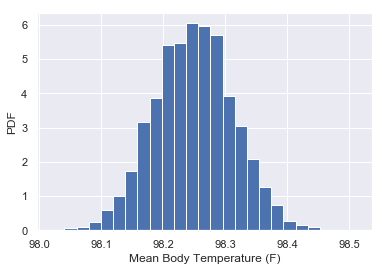

In [122]:
#Bootstrap
# Take 10,000 bootstrap replicates
bs_replicates = draw_bs_replicates(temp_all, 10000)

#confidence interval
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print("95% Confidence interval:", conf_int)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=25,normed = True)
_ = plt.xlabel('Mean Body Temperature (F)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

Temperatures, above and below the confidence interval are considered statistically abnormal. </br>
* By the bootstrap method, we got this window as : [ 98.12613462, 98.37386538] (95% Confidence interval)
* By the Frequentist Aproach, we got this window as : [ 98.12562091772428, 98.37523537753827] (95% Confidence interval)

# Question no 6:

**Is there a significant difference between males and females in normal temperature?**
* **What testing approach did you use and why?**
* **Write a story with your conclusion in the context of the original problem.**



In [144]:
# To explore the differences in male and female temperatures:

temp_male = df[df.gender == 'M'].temperature
temp_female = df[df.gender == 'F'].temperature

mean_male= np.mean(temp_male)
std_male= np.std(temp_male)
mean_female = np.mean(temp_female)
std_female=np.std(temp_female)

mean_diff= mean_female-mean_male
print('The mean temperature of the males: '+ str(mean_male))
print('The standard deviation of the temperatures of the males: '+ str(std_male))
print('The mean temperature of the females: ' + str(mean_female))
print('The standard deviation  of the temperatures of the females: '+str(std_female))
print('The difference of mean temperatures of males and females :' +str(mean_diff))

The mean temperature of the males: 98.1046153846154
The standard deviation of the temperatures of the males: 0.6933598841828696
The mean temperature of the females: 98.39384615384613
The standard deviation  of the temperatures of the females: 0.7377464486428966
The difference of mean temperatures of males and females :0.289230769230727


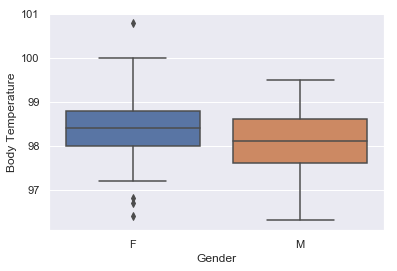

In [136]:
#Visually by the boxplot and ecdf:

_ = sns.boxplot(x= 'Gender', y= 'temperature', data= df)

# Label the axes
_ = plt.xlabel('Gender')
_ = plt.ylabel('Body Temperature')

# Show the plot
plt.show()

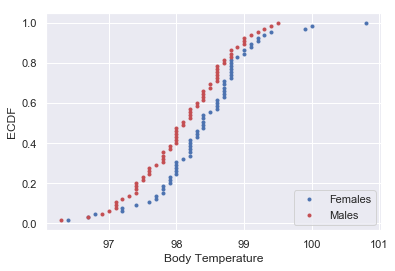

In [142]:
# ECDFs
x_m, y_m = cdf(temp_male)
x_f, y_f = cdf(temp_female)


# Plot all ECDFs on the same plot
_ = plt.plot(x_f, y_f, marker = '.', linestyle='none',color='b')
_ = plt.plot(x_m, y_m, marker = '.', linestyle='none',color='r')

plt.legend(('Females', 'Males'), loc='lower right')
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('ECDF')

plt.show()

* **Hypothesis Testing:**

To test if there is a significant difference between the male and female body temperatures, let us use a two-sample t-test. We have two sample distributions (male and female), and a t-test is appropriate given that we do not know the population standard deviations for the two samples.

**Null Hypothesis:** There is no difference in male and female temperatures.

**Significance Level:** 95.0% Confidence

α=0.05
 
If the P value <  α , Ho will be rejected.


In [153]:
from scipy.stats import ttest_ind
t, p = ttest_ind(temp_male, temp_female)

print('P-value for two-sample t-test: ', p)

if p < 0.05:
    print('As, P < 0.05, Ho must be rejected. There is a significant difference between male and female temperatures.')
else:
    print('Fail to reject Ho.  There is no significant difference')

P-value for two-sample t-test:  0.02393188312239561
As, P < 0.05, Ho must be rejected. There is a significant difference between male and female temperatures.


### Difference between male and female temperatures:

In [158]:

print('The difference of mean temperatures of males and females :' +str(mean_diff))

# Get bootstrap replicates of means
bs_replicates_f = draw_bs_replicates(temp_female, 10000)
bs_replicates_m = draw_bs_replicates(temp_male, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_f - bs_replicates_m

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])


print('95% confidence interval =', conf_int, 'degrees')

The difference of mean temperatures of males and females :0.289230769230727
95% confidence interval = [0.04153846 0.53384615] degrees


### Conclusions:
* Normal temperatures fall within 98.12 to 98.37 degrees
* The true mean is within 98.12 to 98.37 degrees (95% confidence interval)
* Female body temperatures are higher than male temperatures by approximately 0.289 degrees, with a 95% confidence interval of 0.04 to 0.53 degrees higher.